# Planetary Systems

## Radial-velocity data and derivation of planetary physical properties

## Exercise 1

### Problem statement

In the file *star1_radialvelocities.dat* (see below) you can find a time series of radial velocity measurements of one star that has a giant planet in orbit. The file has three columns: the date of the observation (in julian days), the measured radial-velocity (in km/s), and the respective error bar (also in km/s).

A simple visualization of the data shows that it presents, in a first approximation, a sinusoidal variation, typical of the signal produced by a planet in a circular orbit. Then, using any suitable minimization procedure, fit to the data a function of the type:

$$\begin{equation}
RV (t) = K \sin \left(2 \pi \frac{(t - T)}{P}\right) + \gamma 
\end{equation}$$

to derive the semi-amplitude of the signal $(K)$, the moment when its velocity is at zero phase $(T)$, its period $(P)$, and the average velocity of the star $(\gamma)$. 

Compute the respective uncertainties. 

Make a plot comparing the points with the fitted function. (before fitting, depending on the method used, you may first need to estimate the orbital period)

From the fitted parameters, it is possible to derive the mass of the orbiting planet (or at least a minimum value for the mass, $M_{pl} \sin i$) using equation:

$$\begin{equation}
\frac{M^3_{pl} \sin^3 i}{(M_{pl} +M_{st})^2} = 1,036 \times 10^{-7} K^3(1 - e^2)^{3/2}P \;\;[M_\odot]
\end{equation}$$

Here, $P$ is the period of the signal (in days), $K$ is the semi-amplitude of the radial velocity signal of the star $(K = (RV_{max} - RV_{min})/2)$ in $km/s$, $M_{pl}$ and $M_{st}$ are the planetary and stellar masses, respectively, in solar masses. Note that you can approximate $M_{pl} \ll  M_{st}$, and in this particular case, $e=0$. 

What value for the planetary mass did you find (in units of Jupiter masses)? 

Suppose that the star has one solar mass. Using Kepler’s third law ($P^2 =\frac{ a^3}{ M_{pl}+M_{st}} $ , where the masses $M_{pl}$ and $M_{st}$ are in solar masses, the period $P$ in years, and the semi-major axis a in astronomical
units) derive the semi-major axis of the orbit.

Comment on the physical nature of the result obtained.

### Code

In [132]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from scipy import optimize
from scipy import constants
import time
T0 = time.time()

dados = np.loadtxt("star1_radialvelocities.dat")

tempos = dados[:,0]    # (Julian Days)
rv      = dados[:,1]    # (km/s)
rv_errorBar = dados[:,2]# (km/s)

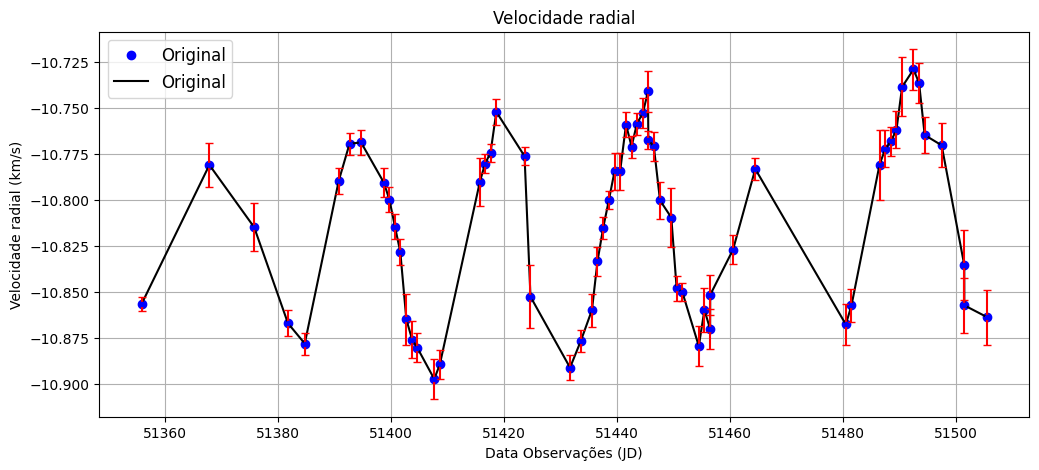

CPU times: total: 344 ms
Wall time: 343 ms


In [133]:
%%time

# Visualizar
plt.figure(figsize=(12,5))
plt.plot( tempos,rv, "o", color="b", label = "Original")
plt.plot( tempos,rv, color="k", label = "Original")
plt.errorbar( tempos, rv, yerr = rv_errorBar , xerr = 0, fmt=".", color="b", ecolor="r", capsize=2.7 )
plt.legend(prop={'size': 12})
plt.title("Velocidade radial")
plt.xlabel('Data Observações (JD)')
plt.ylabel('Velocidade radial (km/s)')
plt.grid()
plt.show()

The value of K     = 0.06168 , with Standard error = 0.00271.
The value of Tau   = 1874.59 , with Standard error = 251.36362.
The value of P     = 24.3313 , with Standard error = 0.12340.
The value of gamma = -10.816 , with Standard error = 0.00199.


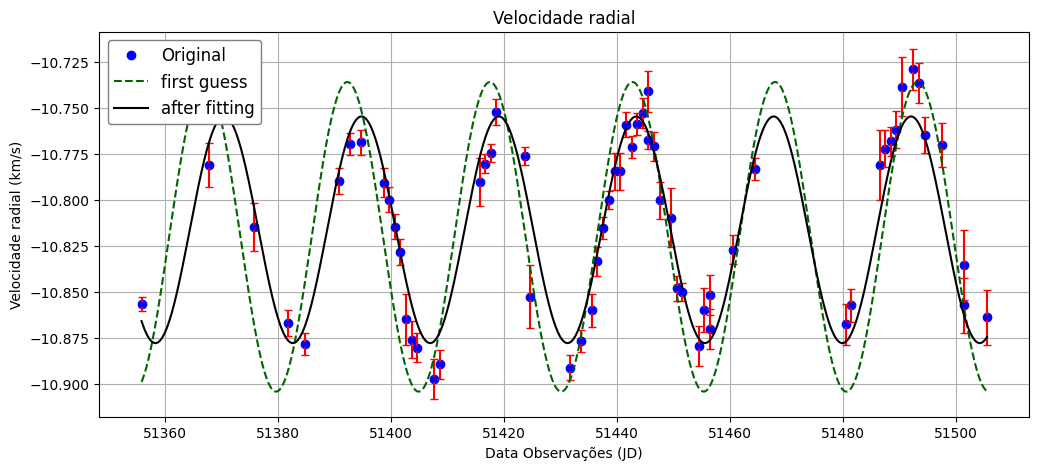

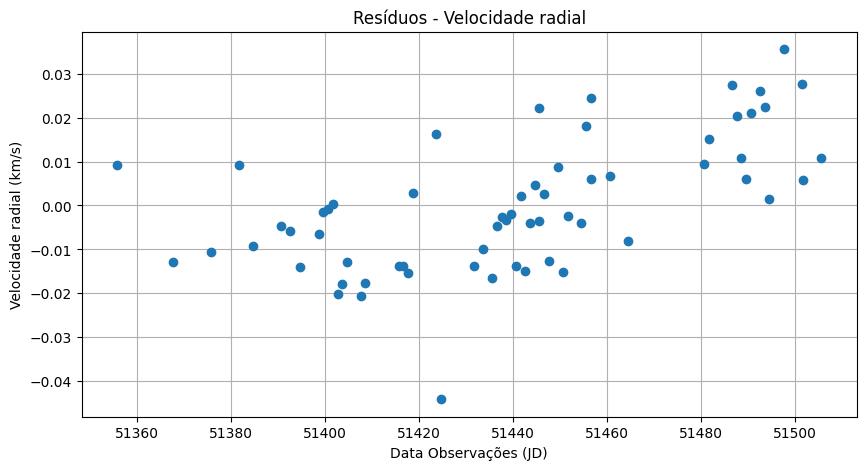

CPU times: total: 828 ms
Wall time: 905 ms


In [134]:
%%time
def rv_func(t , K, tau, Period, gamma):
    return K * np.sin(2*np.pi * (t - tau) / Period) + gamma

N = len(tempos)
tempos2 = np.linspace(tempos[0],tempos[-1], 10**4)

guess0 = [(np.max(rv) - np.min(rv)) / 2, 2*np.pi *0.35, 25.25, -10.82]
# we'll use this to plot our first estimate. This might already be good enough
rv_first_guess = rv_func(tempos2, *guess0)

parameters, covariance = sc.optimize.curve_fit(rv_func, tempos, rv, p0=guess0)
SE = np.sqrt(np.diag(covariance))

print(F'The value of K     = {parameters[0]:.5f} , with Standard error = {SE[0]:.5f}.')
print(F'The value of Tau   = {parameters[1]:.2f} , with Standard error = {SE[1]:.5f}.')
print(F'The value of P     = {parameters[2]:.4f} , with Standard error = {SE[2]:.5f}.')
print(F'The value of gamma = {parameters[3]:.3f} , with Standard error = {SE[3]:.5f}.')

# recreate the fitted curve using the optimized parameters
rv_fit = rv_func(tempos, parameters[0], parameters[1], parameters[2], parameters[3])

rv_fit_bonito = rv_func(tempos2, parameters[0], parameters[1], parameters[2], parameters[3])

plt.figure(figsize=(12,5))
plt.plot( tempos,rv, "o", color="b", label = "Original")
plt.errorbar( tempos, rv, yerr = rv_errorBar , xerr = 0, fmt=".", color="b", ecolor="r", capsize=2.7 )
plt.plot(tempos2,rv_first_guess, "--", color="darkgreen", label='first guess')
plt.plot(tempos2,rv_fit_bonito, color="black", label='after fitting')
plt.legend(loc="upper left", prop={'size': 12}, framealpha=1, edgecolor="grey")
plt.title("Velocidade radial")
plt.xlabel('Data Observações (JD)')
plt.ylabel('Velocidade radial (km/s)')
plt.grid()
plt.savefig("VelRad1.png")
plt.show()

plt.figure(figsize=(10,5))
plt.plot(tempos,rv - rv_fit, "o")
plt.title("Resíduos - Velocidade radial")
plt.xlabel('Data Observações (JD)')
plt.ylabel('Velocidade radial (km/s)')
plt.grid()
plt.savefig("VelRad_res1.png")
plt.show()

In [135]:
# CONSIDERANDO QUE M_* = M_sol

M_sol = 1.98847 * 10**30  # kg
M_Jup = 1.898*10**27      # kg
M_J_Sol = M_Jup / M_sol   # M_Sol 

K = parameters[0]  # km/s
P = parameters[2]  # days

M_pl_sin_i = ( 1.036*10**-7 * K**3 * P )**(1/3)   # M_sol
print(f" M_pl * sin(i) = {M_pl_sin_i:.5f} [M_Sol]")
print(f" M_pl * sin(i) = {M_pl_sin_i * 1/M_J_Sol:.5f} [M_Jup]")

 M_pl * sin(i) = 0.00084 [M_Sol]
 M_pl * sin(i) = 0.87947 [M_Jup]


In [136]:
au = 1.495978707 * 10 ** 11 # m

a = ( sc.constants.G / (4*np.pi**2) * (P*24*3600)**2 * (M_pl_sin_i*M_sol + M_sol)  )**(1/3)
print(f" a = { a :.0f} [m]")
print(f" a = { a/au :.5f} [au]")

# a_dif = (  (P /365.25 )**2 * (M_pl_sin_i + 1)  )**(1/3)  
# print(f" a = { a_dif :.5f} [au]")

 a = 24590192418 [m]
 a = 0.16438 [au]


## Exercise 2

### Problem Statement

The previous problem presented a good example of the signal produced by a
planet that has a circular orbit. However, not all discovered extra-solar planet
have such trajectories. In a general way, a planet produces a signal of the
form:

$$ \begin{equation}
RV (\nu) = \gamma + K[e \cos \omega + \cos (\omega + \nu(t))] 
\end{equation}$$

This is usually called a ”keplerian function”, as it denotes the radial-velocity variations caused by a planet in a generic keplerian orbit around the star. Here, $K$ is the $RV$ amplitude, $e$ the eccentricity, $\omega$ the longitude of periastron, $\gamma$ the constant system $RV$, and $\nu(t)$ the true anomaly. This true anomaly is a function of $t; e; P$, and $T$ (the moment the star passes at periastron) and can be computed in the following way:

1. For a given moment t, and considering the parameters T and P as defined above, compute the mean anomaly, M, by equation:
$$ \begin{equation}
M = 2\pi\frac{(t - T)}{P}
\end{equation}$$

2. From the derived value of $M$. Compute the eccentric anomaly $E$ by solving Kepler’s equation:
$$ \begin{equation}
M = E - e \sin(E)
\end{equation}$$

3. Compute the true anomaly $\nu$, considering the orbital eccentricity $e$ and the derived valure for $E$:
$$ \begin{equation}
\tan\left(\frac{\nu}{2}\right) = \sqrt{\frac{1 + e}{1 - e}} \tan\left(\frac{E}{2}\right)
\end{equation}$$

Note that Kepler’s Equation (step 2) is transcendental, and has to be solved iteratively (e.g. using the Newton-Raphson method). A simple scheme to solve it is using a procedure like the following:
$$ \begin{split}
E_0 &= M + e \sin M + \frac{e^2}{2} \sin 2M \\
M_0 &= E_0 - e \sin E_0 \\
E_1 &= E_0 + \frac{M-M_0}{1- e \cos E_0} \\
M_1 &= E_1 - e \sin E_1 \\
&(...)
\end{split} $$

A few iterations are enough to achieve convergence.

Here we propose that you make a small computer program to draw the shape of the keplerian function for 4 different sets of parameters:

$P=100$ days, 

$K=0.1$ km/s, 

$\gamma =0$, 

$T=0$, 

1. $e=0.3$, $\omega=0$

2. $e=0.3$, $\omega=\pi$

3. $e=0.6$, $\omega=0$

4. $e=0.9$, $\omega=0$

### Code

0.16437528356929235
No solution after 1000 iterations
No solution after 1000 iterations
No solution after 1000 iterations
No solution after 1000 iterations
No solution after 1000 iterations
No solution after 1000 iterations
No solution after 1000 iterations
No solution after 1000 iterations


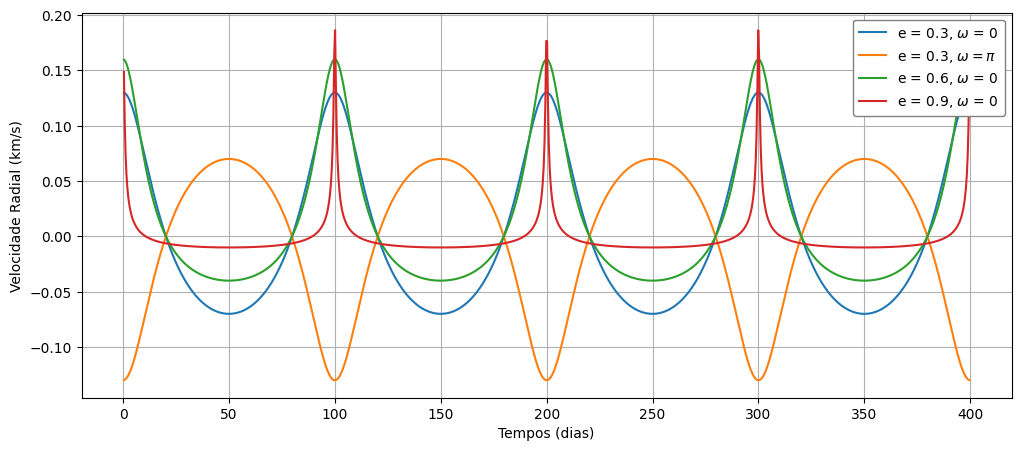

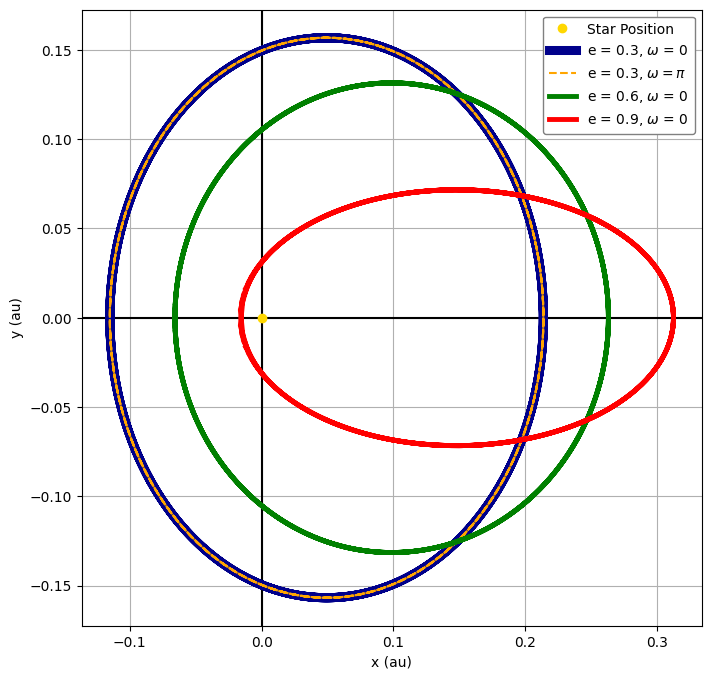

No solution after 1000 iterations
No solution after 1000 iterations
No solution after 1000 iterations
No solution after 1000 iterations
No solution after 1000 iterations
No solution after 1000 iterations
No solution after 1000 iterations
No solution after 1000 iterations
No solution after 1000 iterations
No solution after 1000 iterations
No solution after 1000 iterations
No solution after 1000 iterations


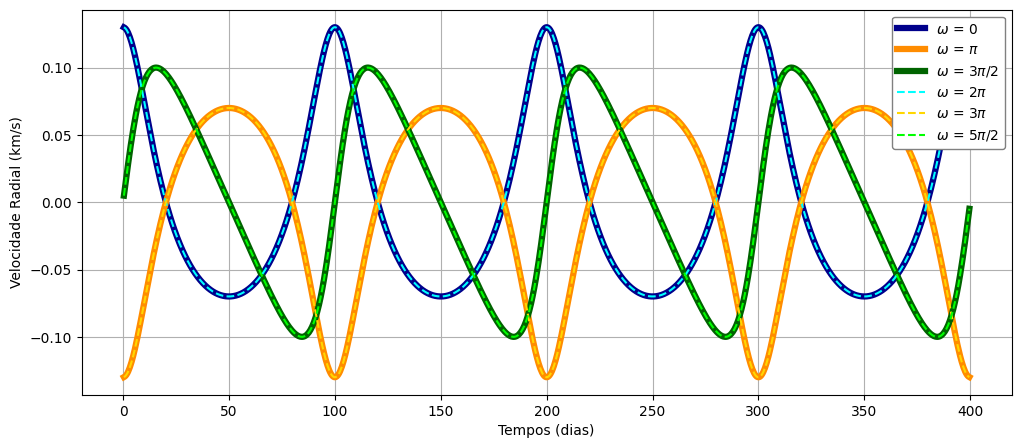

CPU times: total: 2.77 s
Wall time: 2.79 s


In [137]:
%%time

#Anomalia Média
def determinarMs(lista_tempo, tau, Tplaneta):
    Npontos = len(lista_tempo)
    M = np.zeros(Npontos)
    for i in range(Npontos):
        # queremos que   (tempos[i]-tau)/Tplaneta   varie entre (0 e 1)
        Mtemp = 2*np.pi * ( (lista_tempo[i]-tau)/Tplaneta   - int(  (lista_tempo[i]-tau)/Tplaneta ))
        # se for negativo acrescentamos 2*np.pi
        if Mtemp < 0: 
            M[i] = Mtemp + 2*np.pi
        else:
            M[i] = Mtemp 
    return M

# Anomalia Excentrica
def determinarEs(lista_tempo, tau, e, M):
    Npontos = len(lista_tempo)

    def bisection(f,a,b,tol,max_iter):
        for i in range(max_iter):
            x_est=(a+b)/2  

            if f(a)*f(x_est)<0: 
                b=x_est
            else: 
                a=x_est
            if np.abs(f(x_est))<tol:
                break
        if i==max_iter-1: 
            print('No solution after %d iterations' %max_iter)
            return
        else:
            return x_est

    def func(E):
        return E - e*np.sin(E) - M[i]

    valoresE = np.ones( Npontos )
    for i in range( Npontos  ):
        valoresE[i] = bisection(func,0,2*np.pi,10**-6, len(lista_tempo) )

    return valoresE

def determinarTrueAnom(e , E):
    return 2 * np.arctan( np.sqrt((1+e)/(1-e)) * np.tan(E/2) )

def determinarRV(gamma, K, e, omega, nu):
    return gamma + K*( e*np.cos(omega) + np.cos(omega + nu) )

def determinar_b(a,e):
    return a * np.sqrt(1-e**2)


def RV(lista_tempo, tau, Tplaneta, gamma, K, e, omega):

    Npontos = len(lista_tempo)
    M = np.zeros(Npontos)
    for i in range(Npontos):
        Mtemp = 2*np.pi * ( (lista_tempo[i]-tau)/Tplaneta   - int(  (lista_tempo[i]-tau)/Tplaneta ))
        if Mtemp < 0: 
            M[i] = Mtemp + 2*np.pi
        else:
            M[i] = Mtemp

    def bisection(f,a,b,tol,max_iter):
        for i in range(max_iter):
            x_est=(a+b)/2  

            if f(a)*f(x_est)<0: 
                b=x_est
            else: 
                a=x_est
            if np.abs(f(x_est))<tol:
                break
        if i==max_iter-1: 
            print('No solution after %d iterations' %max_iter)
            return
        else:
            return x_est

    def func(E):
        return E - e*np.sin(E) - M[i]

    valoresE = np.ones( Npontos )
    for i in range( Npontos  ):
        valoresE[i] = bisection(func,0,2*np.pi,10**-6, len(lista_tempo) )
        
    nu = 2 * np.arctan( np.sqrt((1+e)/(1-e)) * np.tan(valoresE/2) )
    
    return gamma + K*( e*np.cos(omega) + np.cos(omega + nu) )

# Parametros
P1 = 100 # dias
K = 0.1 # km/s
gamma = 0
tau = 0
e = [0.3 , 0.6 , 0.9]
omega = [0 , np.pi, 1.5*np.pi]

a1 = a/au
print(a1)

lista_t = np.linspace(0, 4*P1, 1000)

M_anom = determinarMs(lista_t, tau, P1) 
#print(M_anom)



E_anom1 = determinarEs(lista_t, tau, e[0], M_anom) 
nu_anom1 = determinarTrueAnom( e[0], E_anom1 )
rv_nu1 = determinarRV(gamma, K, e[0], omega[0], nu_anom1) 
rx1 = a1 * (e[0] - np.cos(E_anom1))
ry1 = determinar_b(a1,e[0]) * np.sin(E_anom1)

E_anom2 = determinarEs(lista_t, tau, e[0], M_anom) 
nu_anom2 = determinarTrueAnom( e[0], E_anom2 )
rv_nu2 = determinarRV(gamma, K, e[0], omega[1], nu_anom2) 
rx2 = a1 * (e[0] - np.cos(E_anom2))
ry2 = determinar_b(a1,e[0]) * np.sin(E_anom2)

E_anom3 = determinarEs(lista_t, tau, e[1], M_anom) 
nu_anom3 = determinarTrueAnom( e[1], E_anom1 )
rv_nu3 = determinarRV(gamma, K, e[1], omega[0], nu_anom3) 
rx3 = a1 * (e[1] - np.cos(E_anom3))
ry3 = determinar_b(a1,e[1]) * np.sin(E_anom3)

E_anom4 = determinarEs(lista_t, tau, e[2], M_anom) 
nu_anom4 = determinarTrueAnom( e[2], E_anom4 )
rv_nu4 = determinarRV(gamma, K, e[2], omega[0], nu_anom4) 
rx4 = a1 * (e[2] - np.cos(E_anom4))
ry4 = determinar_b(a1,e[2]) * np.sin(E_anom4)

plt.figure(figsize=(12,5))
plt.plot(lista_t, rv_nu1, label=F"e = {e[0]}, $\omega$ = {omega[0]}")
plt.plot(lista_t, rv_nu2, label=F"e = {e[0]}, $\omega=\pi$")
plt.plot(lista_t, rv_nu3, label=F"e = {e[1]}, $\omega$ = {omega[0]}")
plt.plot(lista_t, rv_nu4, label=F"e = {e[2]}, $\omega$ = {omega[0]}")
plt.xlabel("Tempos (dias)")
plt.ylabel("Velocidade Radial (km/s)")
plt.legend(loc="upper right", framealpha=1, edgecolor="grey")
plt.grid()
plt.savefig("VelRad_parametros.png")
plt.show()

plt.figure(figsize=(8,8))
plt.axhline(y=0,color="k")
plt.axline((0,-0.1) , (0,0.1) ,color="k")
plt.plot(0,0, "o", color="gold",label="Star Position")
plt.plot(rx1,ry1, linewidth=6.5, color="darkblue", label=F"e = {e[0]}, $\omega$ = {omega[0]}")
plt.plot(rx2,ry2, "--", color="orange", label=F"e = {e[0]}, $\omega = \pi$")
plt.plot(rx3,ry3, linewidth=3.5, color="green", label=F"e = {e[1]}, $\omega$ = {omega[0]}")
plt.plot(rx4,ry4, linewidth=3.5, color="red", label=F"e = {e[2]}, $\omega$ = {omega[0]}")
plt.xlabel("x (au)")
plt.ylabel("y (au)")
plt.legend(loc="upper right", framealpha=1, edgecolor="grey")
plt.grid()
plt.savefig("Orbitas.png")
plt.show()



rv_qq0 = RV(lista_t,0, 100, 0, 0.1, 0.3, omega[0]) 
rv_qq1 = RV(lista_t,0, 100, 0, 0.1, 0.3, omega[1]) 
rv_qq2 = RV(lista_t,0, 100, 0, 0.1, 0.3, omega[2]) 
rv_qq3 = RV(lista_t,0, 100, 0, 0.1, 0.3, omega[0]+2*np.pi) 
rv_qq4 = RV(lista_t,0, 100, 0, 0.1, 0.3, omega[1]+2*np.pi) 
rv_qq5 = RV(lista_t,0, 100, 0, 0.1, 0.3, omega[2]+2*np.pi) 

plt.figure(figsize=(12,5))
plt.plot(lista_t, rv_qq0, linewidth=4.5, color ="darkblue", label=F"$\omega$ = 0")
plt.plot(lista_t, rv_qq1, linewidth=4.5, color="darkorange", label=F"$\omega$ = $\pi$")
plt.plot(lista_t, rv_qq2, linewidth=4.5, color="darkgreen", label=F"$\omega$ = 3$\pi$/2")
plt.plot(lista_t, rv_qq3, "--", color="aqua", label=F"$\omega$ = 2$\pi$")
plt.plot(lista_t, rv_qq4, "--", color="gold", label=F"$\omega$ = 3$\pi$")
plt.plot(lista_t, rv_qq5, "--", color="lime", label=F"$\omega$ = 5$\pi$/2")
plt.grid()
plt.xlabel("Tempos (dias)")
plt.ylabel("Velocidade Radial (km/s)")
plt.legend(framealpha=1, edgecolor="grey")
plt.savefig("VelRad_omegas.png")
plt.show()

## Exercise 3

### Problem Statement

In the file *star2_radialvelocities.dat* (see below) you can find a radial-velocity time series similar to the one presented in exercise 1. In this case, however, a circular orbit is not a good approximation.

In the present exercise, we ask you to fit (and visualize) a keplerian function to the observed data. List the derived (fitted) parameters $P, e, K, \gamma, T, \omega,$ that best represent the observed radial-velocity variation, and their respective uncertainties.

From the fitted parameters, derive the semi-major axis of the orbit and the minimum mass of the companion as in exercise 1. 

Comment on the result.

### Code

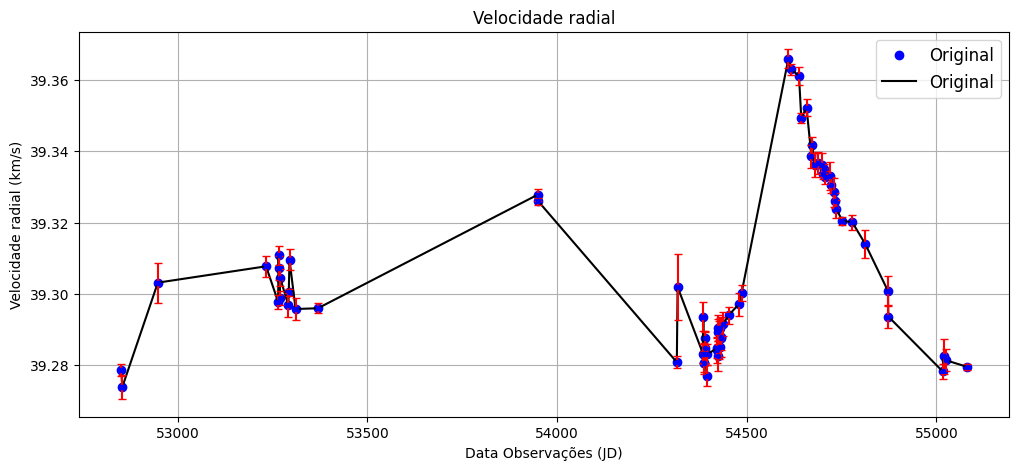

In [138]:
dados_2 = np.loadtxt("star2_radialvelocities.dat")

tempos_2 = dados_2[:,0]     # (Julian Days)
rv_2     = dados_2[:,1]     # (km/s)
rv_errorBar_2 = dados_2[:,2]# (km/s)

plt.figure(figsize=(12,5))
plt.plot( tempos_2,rv_2, "o", color="b", label = "Original")
plt.plot( tempos_2,rv_2, color="k", label = "Original")
plt.errorbar( tempos_2, rv_2, yerr = rv_errorBar_2 , xerr = 0, fmt=".", color="b", ecolor="r", capsize=2.7 )
plt.legend(prop={'size': 12})
plt.title("Velocidade radial")
plt.xlabel('Data Observações (JD)')
plt.ylabel('Velocidade radial (km/s)')
plt.grid()
plt.show()

tau   = 439.771 , with Standard Error = 0.54253.
Period= 752.079 , with Standard Error = 0.18228.
gamma = 39.3073 , with Standard Error = 0.00119.
K     = 0.04106 , with Standard Error = 0.00216.
e     = 0.41315 , with Standard Error = 0.00157.
omega = 5.86493 , with Standard Error = 0.08682.


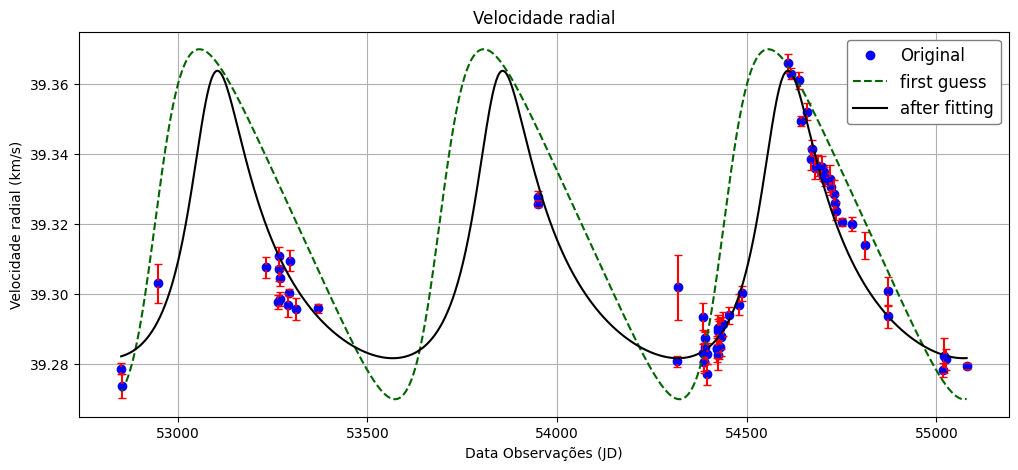

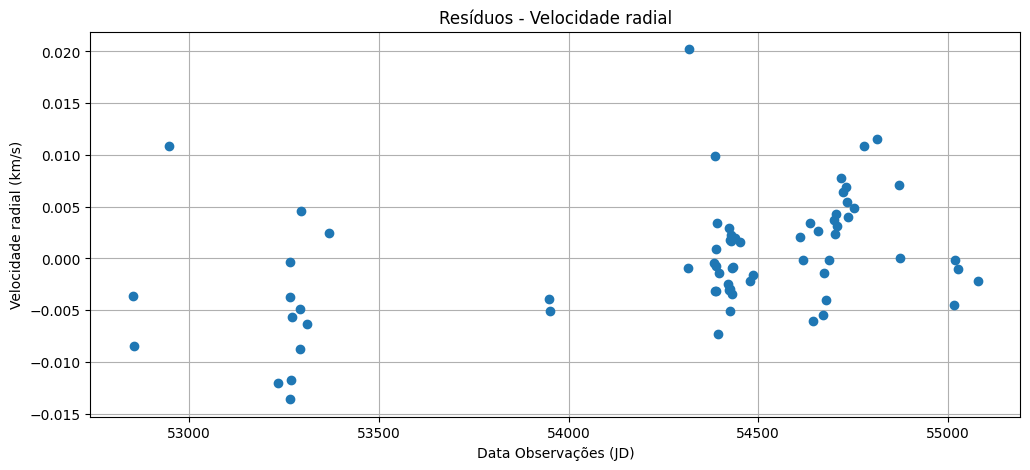

CPU times: total: 1.84 s
Wall time: 1.87 s


In [139]:
%%time
def RV(lista_tempo, tau, Tplaneta, gamma, K, e, omega):

    Npontos = len(lista_tempo)
    M = np.zeros(Npontos)
    for i in range(Npontos):
        Mtemp = 2*np.pi * ( (lista_tempo[i]-tau)/Tplaneta   - int(  (lista_tempo[i]-tau)/Tplaneta ))
        if Mtemp < 0: 
            M[i] = Mtemp + 2*np.pi
        else:
            M[i] = Mtemp

    def bisection(f,a,b,tol,max_iter):
        for i in range(max_iter):
            x_est=(a+b)/2  

            if f(a)*f(x_est)<0: 
                b=x_est
            else: 
                a=x_est
            if np.abs(f(x_est))<tol:
                break
        if i==max_iter-1: 
            print('No solution after %d iterations' %max_iter)
            return
        else:
            return x_est

    def func(E):
        return E - e*np.sin(E) - M[i]

    valoresE = np.ones( Npontos )
    for i in range( Npontos  ):
        valoresE[i] = bisection(func,0,2*np.pi,10**-6, len(lista_tempo) )
        
    nu = 2 * np.arctan( np.sqrt((1+e)/(1-e)) * np.tan(valoresE/2) )
    
    return gamma + K*( e*np.cos(omega) + np.cos(omega + nu) )

Npts = 10**3
tempo_bonito = np.linspace( tempos_2[0], tempos_2[-1], Npts)

#        [tau,      Tplaneta, gamma, K, e,   omega  ]
guess2 = [2*np.pi*70, 750, 39.32, 0.05, 0.3, 2*np.pi * 0.75 ]   

rv_2_guess = RV( tempo_bonito, *guess2)

parameters_2, covariance_2 = sc.optimize.curve_fit(RV, tempos_2, rv_2, p0=guess2)
SE_2 = np.sqrt(np.diag(covariance_2))

print(F'tau   = {parameters_2[0]:.3f} , with Standard Error = {SE_2[0]:.5f}.')
print(F'Period= {parameters_2[1]:.3f} , with Standard Error = {SE_2[1]:.5f}.')
print(F'gamma = {parameters_2[2]:.4f} , with Standard Error = {SE_2[2]:.5f}.')
print(F'K     = {parameters_2[3]:.5f} , with Standard Error = {SE_2[3]:.5f}.')
print(F'e     = {parameters_2[4]:.5f} , with Standard Error = {SE_2[4]:.5f}.')
print(F'omega = {parameters_2[5]:.5f} , with Standard Error = {SE_2[5]:.5f}.')

# recreate the fitted curve using the optimized parameters
rv_2_fited = RV( tempos_2, parameters_2[0],parameters_2[1], parameters_2[2], parameters_2[3], parameters_2[4], parameters_2[5] )

rv_2_bonito = RV( tempo_bonito, parameters_2[0],parameters_2[1], parameters_2[2], parameters_2[3], parameters_2[4], parameters_2[5] )


plt.figure(figsize=(12,5))
plt.plot( tempos_2,rv_2, "o", color="b", label = "Original")
plt.errorbar( tempos_2, rv_2, yerr = rv_errorBar_2 , xerr = 0, fmt=".", color="b", ecolor="r", capsize=2.7 )

plt.plot(tempo_bonito, rv_2_guess,"--", color="darkgreen", label="first guess")
# plt.plot(tempos_2, rv_2_fited )
plt.plot(tempo_bonito, rv_2_bonito, color="k", label="after fitting" )

plt.legend(loc="upper right", prop={'size': 12}, framealpha=1, edgecolor="grey")
plt.title("Velocidade radial")
plt.xlabel('Data Observações (JD)')
plt.ylabel('Velocidade radial (km/s)')
plt.grid()
plt.savefig("VelRad2.png")
plt.show()

plt.figure(figsize=(12,5))
plt.plot(tempos_2,rv_2 - rv_2_fited, "o")
plt.title("Resíduos - Velocidade radial")
plt.xlabel('Data Observações (JD)')
plt.ylabel('Velocidade radial (km/s)')
plt.grid()
plt.savefig("VelRad_res2.png")
plt.show()

In [140]:
# CONSIDERANDO QUE M_* = M_sol

K_2 = parameters_2[3]  # km/s
P_2 = parameters_2[1]  # days
e_2 = parameters_2[4]  

M_pl_sin_i_2 = ( 1.036*10**-7 * K_2**3 * (1-e_2**2)**(3/2) * P_2 )**(1/3)   # M_sol
print(f" M_pl * sin(i) = {M_pl_sin_i_2:.5f} [M_Sol]")
print(f" M_pl * sin(i) = {M_pl_sin_i_2 * 1/M_J_Sol:.5f} [M_Jup]")


print()

a_2 = ( sc.constants.G/(4+np.pi**2) * (P_2*24*3600)**2 * (M_pl_sin_i_2*M_sol + M_sol) )**(1/3)  
print(f" a = { a_2 :.0f} [m]")
print(f" a = { a_2/au :.5f} [au]")

 M_pl * sin(i) = 0.00160 [M_Sol]
 M_pl * sin(i) = 1.67322 [M_Jup]

 a = 343322965237 [m]
 a = 2.29497 [au]


### Tempo

In [141]:
#################################### Tempo total que o programa demora a correr ############################################
t1=time.time()
print("O código do notebook inteiro demorou um total de {} min e {} segundos a correr.".format((t1-T0)//60,int((t1-T0)%60)))

O código do notebook inteiro demorou um total de 0.0 min e 6 segundos a correr.
